In [24]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.common import NoSuchElementException
# from selenium.w
import pandas as pd
import numpy as np
from time import sleep

import selenium



In [57]:
# https://stackoverflow.com/questions/76086069/selenium-webdriver-click-on-accept-cookies-button

options = Options()
options.add_argument("start-maximized")
driver = Chrome(options=options)
driver.get('https://www.reddit.com/r/ethtrader/')
driver.get('https://www.reddit.com/search/?q=Ethereum&sort=new')

sleep(2)

# driver.find_element(By.XPATH, '//*[@id="SHORTCUT_FOCUSABLE_DIV"]/div[3]/div/section/div/section[2]/section[2]/form/button').click()
# sleep(1)
# driver.find_element(By.XPATH, '//*[@id="SHORTCUT_FOCUSABLE_DIV"]/div[4]//div/div/button').click()
# sleep(1)

# driver.find_element(By.XPATH, '//*[@id="AppRouter-main-content"]/div/div/div[2]/div[4]/div[1]/div[1]/div[2]/a[2]').click()


# shadow = driver.find_element(By.TAG_NAME, "shreddit-async-loader").shadow_root
# sleep(2)
# shadow.find_element(By.ID, "accept-all-cookies-button").click()

# # driver.find_element(By.XPATH, "//span[contains(text(), 'Reject non-essential')]")

# drop_down = driver.find_element(By.XPATH, "//div[@slot='dropdown-items']")
# drop_down.click()

# Find the parent element containing the shadow DOM
parent_element = driver.find_element(By.TAG_NAME, "reddit-cookie-banner")

# Get the shadow root of the parent element
shadow_root = driver.execute_script("return arguments[0].shadowRoot;", parent_element)

# Now you can interact with elements within the shadow root
try:
    accept_button = shadow_root.find_element(By.ID, "accept-all-cookies-button")
    accept_button.click()
except NoSuchElementException:
    print("Accept button not found")


sleep(2)
driver.find_element(By.XPATH, '//a[@id="login-button"]').click()
sleep(1)
driver.find_element(By.XPATH, '//div[@class="BottomText login "]').click()

username = driver.find_element(By.XPATH, '//input[@id="loginUsername"]')

username.send_keys(Keys.CONTROL + 'a')
username.send_keys('johnomage')

password = driver.find_element(By.XPATH, '//input[@id="loginPassword"]')
password.send_keys('Success_1226')
driver.find_element(By.XPATH, "//fieldset[5]/button").click()

# sleep(1.3)
# driver.get(driver.current_url + '/r/ethereum/')
sleep(2.5)
driver.find_element(By.XPATH, '//*[@id="AppRouter-main-content"]/div/div/div[2]/div[2]/div[1]/div[2]/div[2]/a[3]').click()



In [59]:
sleep(2)
search =driver.find_element(By.XPATH, '//input[@type="search"]')
search.send_keys(Keys.CONTROL + 'a')
search.send_keys('Ethereum')
search.send_keys(Keys.RETURN)
# driver.find_element(By.XPATH, '/html/body/div[55]/div/a[4]/button').click()

In [15]:
def scrape(pause_time=2, max_posts=100):
    data = {'post': [], 'date': []}
    scroll_attempts = 0
    max_scroll_attempts = 5

    while len(data['post']) < max_posts:# and scroll_attempts < max_scroll_attempts:
        posts = driver.find_elements(By.XPATH, '//a[@data-testid="post-title"]')
        datetimes = driver.find_elements(By.XPATH, '//time')

        for post in posts:
            data['post'].append(post.text)

        for datetime in datetimes:
            data['date'].append(datetime.get_attribute('title'))

        # Perform auto-scroll using JavaScript
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait for a short time for new content to load
        sleep(pause_time)

        # Count the number of scroll attempts
        scroll_attempts += 1

    return pd.DataFrame(data)



In [60]:

try:
    eth_reddit_data = scrape(max_posts=50000)
except:
    eth_reddit_data

In [174]:
eth_reddit_data.head()

,post
date,
2023-07-24 01:47:08-01:00,THE Q NETWORK AND ITS COMMUNITY
2023-07-24 01:44:27-01:00,Newton Referral Code - New users get a $25 sig...
2023-07-24 01:20:43-01:00,"Figment is hiring Principal DevOps Engineer, E..."
2023-07-24 01:01:42-01:00,r/AlgorandOfficial Weekly Recap: Jul 17 - Jul ...
2023-07-24 01:01:26-01:00,Unleashing the Power of INFRA Token: 5 Incredi...


In [176]:
# eth_reddit_data['date'] = pd.to_datetime(eth_reddit_data['date'])

# eth_reddit_data.set_index('date', inplace=True)

eth_reddit_data.resample('H').last()
# eth_reddit_data.head(20)

,post
date,
2023-07-22 17:00:00-01:00,Quiet Ethereum Hits a Possible Bottom: What On...
2023-07-22 18:00:00-01:00,Sarcophagus(Dead man-switch); a better option ...
2023-07-22 19:00:00-01:00,"Solana to Soar 870% After Ethereum’s Bull Run ,👀"
2023-07-22 20:00:00-01:00,Money Matters: The rise of digital currencies ...
2023-07-22 21:00:00-01:00,Theory: GPU mining either lives or dies with R...
2023-07-22 22:00:00-01:00,New Lido drop wich supported by Ethereum! We'r...
2023-07-22 23:00:00-01:00,buy cards with ethereum
2023-07-23 00:00:00-01:00,Nano Faces Hate Despite Its Useful and Fully D...
2023-07-23 01:00:00-01:00,Santiment Explains Why Ethereum Could Soon Ret...


66

In [184]:
se = 'this is me no'
len(se.split())

4

In [210]:
# resampled = eth_reddit_data.resample('H').last()
# resampled.reset_index(inplace=True)

def dothis(x):
    return (len(x.split()) * 5 / 16)

eth_reddit_data['score'] = eth_reddit_data['post'].apply(lambda x: dothis(x))
eth_reddit_data['sentiment'] = eth_reddit_data['score'].apply(lambda x: 1 if x>3 else (-1 if x < 3 else 0))

In [211]:
eth_reddit_data

,post,score,sentiment
date,,,
2023-07-24 01:47:08-01:00,THE Q NETWORK AND ITS COMMUNITY,1.8750,-1
2023-07-24 01:44:27-01:00,Newton Referral Code - New users get a $25 sig...,4.6875,1
2023-07-24 01:20:43-01:00,"Figment is hiring Principal DevOps Engineer, E...",5.6250,1
2023-07-24 01:01:42-01:00,r/AlgorandOfficial Weekly Recap: Jul 17 - Jul ...,2.8125,-1
2023-07-24 01:01:26-01:00,Unleashing the Power of INFRA Token: 5 Incredi...,4.0625,1
...,...,...,...
2023-07-22 18:02:16-01:00,What does this mean exactly? Ethereum (ERC-20),2.1875,-1
2023-07-22 17:52:56-01:00,Quiet Ethereum Hits a Possible Bottom: What On...,3.1250,1
2023-07-22 17:48:53-01:00,AITAH for selling to fast,1.5625,-1


<Axes: xlabel='date'>

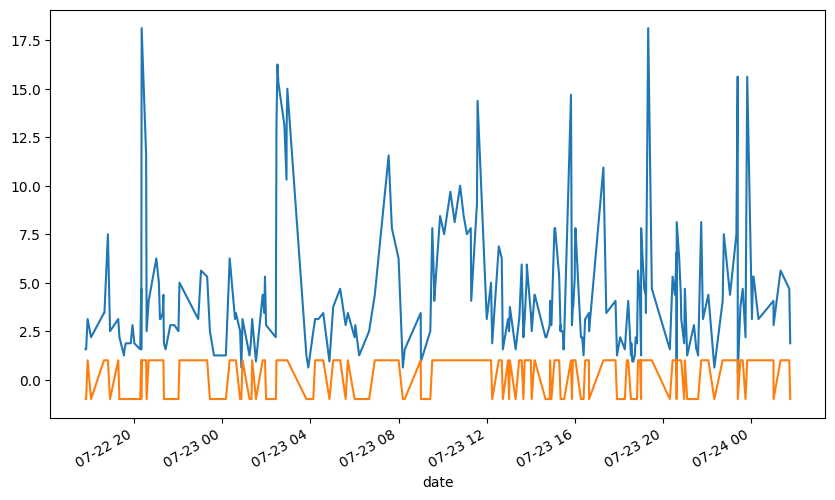

In [215]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,6))

eth_reddit_data['score'].plot()
eth_reddit_data['sentiment'].plot()


In [64]:
eth_reddit_data['post'].value_counts()

AITAH for selling too fast?                                                                                                                                           220
Ethereum's Hidden Potential: These Indicators Point to a Looming Surge... I'm Long-Term 125.14 staked ETH and 22.55 cbETH (TOTAL STAKED ETH = 148.69 ETH). GLTA!!!    110
Rose Road available for purchase on OpenSea                                                                                                                            88
Ethereum Surges with Record Inflows to Centralized Exchanges, Tops $52.3 Billion in Staking Activity                                                                   80
Elon Musk announced big news for crypto users                                                                                                                          66
                                                                                                                                                      

In [99]:
post_list = []
datetime_list = []

reddit = dict()
# for selector in driver.find_elements(By.XPATH, '//*[@id="AppRouter-main-content"]//div[2]/div[4]/div[1]'):
post = [post.text for post in driver.find_elements(By.XPATH, '//h3') if post.text != "" and driver.find_element(By.XPATH, '//div[3]//div[1]//div[1]/span[2]/span').text != 'promoted']
datetime = [dt.text for dt in driver.find_elements(By.XPATH, '//*[@data-testid="post_timestamp"]') if dt.text != ""]
# post_list.extend(post)
# datetime_list.extend(datetime)
reddit["post"] = post
reddit["datetime"] = datetime



In [100]:
reddit

{'post': ['There used to be a bot that prevented people from posting duplicate links, but now I see a lot of links posted more than once by different people. Did that bot stop working or something? See how this screenshot shows the same story posted 3 times, while the same link has been posted twice.',
  'Wtf ?',
  'Sam Bankman-Fried is paying his defense lawyers with $10 million of misappropriated FTX funds, lawsuit says',
  'Look like a pro even if you’re a beginner. And if you’re already a pro, look…even more pro. Either way, you can easily build a professional website with Squarespace.',
  'Ethereum rivals are ‘dead on arrival,’ says Cumberland’s Van Bourg',
  'FTX Seeks to Recover $71M From Its Philanthropic Arm',
  "FTX's Sam Bankman-Fried Sued $1Bn",
  'DeFi Protocol Conic Finance Hacked for 1700 ETH',
  'Justin Sun’s stUSDT dominates real-world asset DeFi as the sector doubles',
  'What did Vitalik Buterin talk about during Ethereum Community Conference in Paris?',
  'The retai

In [103]:
len(reddit.values())

2

## Attention Mechanism

In [124]:
import math

L, d_k, d_v = 4, 8, 8

Q = np.random.randn(L, d_k)
K = np.random.randn(L, d_k)
V = np.random.randn(L, d_k)

In [138]:
# masking: required on the decoder part of the network so to avoid next data leak while predicting.

mask = np.tril(np.ones((4, 4)))
mask[mask == 0] = -np.inf
mask[mask == 1] = 0
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [130]:
print("Q\n", Q)
print()
print("K\n", K)
print()
print("V\n", V)

Q
 [[-1.47438528  1.09797519  0.59137637  0.26588537 -0.22243095 -1.22119785
   0.65492499 -0.81100081]
 [-1.93268981  0.97470505  0.71049473  1.39386818  1.12514923 -1.13331661
  -1.58462164 -2.8913052 ]
 [ 0.13551959  0.45501999 -0.90894768  1.40465213 -0.11986317  0.61801399
  -0.31601074  0.83216039]
 [-1.03079678 -0.7462571  -0.31090622  1.4952422   0.03059891  1.1234991
  -0.74893077  0.85167409]]

K
 [[-0.33758185 -0.13612053 -0.43429339  0.47220171  1.4811833   0.84777833
  -1.34028059 -0.44507707]
 [ 0.93633881 -1.23821056 -0.12811214 -0.07278392  0.01545429 -0.31646845
   1.29782545  0.51785363]
 [-1.35811037  0.4762057   0.54431666  2.71778376  0.32378714 -0.68386631
  -0.0809747   0.07651498]
 [ 1.09053381  0.56826578 -0.80610249  1.14875414 -0.84466173  0.42195016
   1.24137883 -2.43376338]]

V
 [[ 0.32110211  1.24480375 -0.35917001 -0.57384278 -0.61081449 -0.24052915
   0.30156174  0.72994098]
 [-1.01714328 -2.10842189  0.42782535  0.90179915  1.0172626   0.18422921
   1.

In [140]:
scaled = np.matmul(Q, K.T)/math.sqrt(d_k**2) # using the dimension of Key vector as the scaler.
scaled

array([[-0.20807525, -0.25276645,  0.52722308,  0.16302376],
       [ 0.62322871, -0.79835058,  1.03879557,  0.38947145],
       [ 0.16873871, -0.07486637,  0.37290381,  0.08713879],
       [ 0.36414465, -0.12452105,  0.53830901, -0.26677104]])

In [141]:
scaled + mask

array([[-0.20807525,        -inf,        -inf,        -inf],
       [ 0.62322871, -0.79835058,        -inf,        -inf],
       [ 0.16873871, -0.07486637,  0.37290381,        -inf],
       [ 0.36414465, -0.12452105,  0.53830901, -0.26677104]])

In [149]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [144]:
attention = np.matmul(softmax(scaled + mask), V)
attention

array([[ 0.32110211,  1.24480375, -0.35917001, -0.57384278, -0.61081449,
        -0.24052915,  0.30156174,  0.72994098],
       [ 0.06092831,  0.59288934, -0.206167  , -0.28695715, -0.29429332,
        -0.15795012,  0.53580775,  0.38204087],
       [-0.6319874 ,  0.05789191,  0.45441002, -0.43990378,  0.38458116,
        -0.13070196,  0.65844989,  0.41699038],
       [-0.52440885, -0.02676498,  0.53150419, -0.47251749,  0.20742857,
         0.22250696,  0.7586019 ,  0.67341139]])

In [150]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T


def score_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(Q, K.T)/math.sqrt(d_k**2) # using the dimension of Key vector as the scaler.

    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    score = np.matmul(softmax(scaled), V)

    return score, attention


score_attention(Q, K, V, mask)

(array([[ 0.32110211,  1.24480375, -0.35917001, -0.57384278, -0.61081449,
         -0.24052915,  0.30156174,  0.72994098],
        [ 0.06092831,  0.59288934, -0.206167  , -0.28695715, -0.29429332,
         -0.15795012,  0.53580775,  0.38204087],
        [-0.6319874 ,  0.05789191,  0.45441002, -0.43990378,  0.38458116,
         -0.13070196,  0.65844989,  0.41699038],
        [-0.52440885, -0.02676498,  0.53150419, -0.47251749,  0.20742857,
          0.22250696,  0.7586019 ,  0.67341139]]),
 array([[1.        , 0.        , 0.        , 0.        ],
        [0.80558588, 0.19441412, 0.        , 0.        ],
        [0.33219305, 0.26037196, 0.40743499, 0.        ],
        [0.29977817, 0.18389723, 0.35681133, 0.15951327]]))